In [88]:
participant_id = "P3"

In [89]:
%load_ext autoreload
%autoreload 2
from hireverse.utils.utils import *

VID_FILE_PATH = BASE_DIR + "/data/raw/videos"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
from hireverse.utils.face_analyzer import FaceAnalyzer
from hireverse.schemas.frame import Frame
face_analyzer = FaceAnalyzer()
frames = face_analyzer.get_video_frames_for_participant(
    participant_id, VID_FILE_PATH, target_fps=20, num_selected_frames=20)

In [91]:
for frame in frames:
    frame.resize(new_width=640)

In [92]:
filtered_frames: List[Frame] = []
for frame in frames:
    detected_faces_landmarks = face_analyzer.process_image_results(frame.image)
    frame.facial_landmarks_obj = face_analyzer.get_largest_face_landmarks_obj(frame.image, detected_faces_landmarks)
    if frame.facial_landmarks_obj:
        frame.facial_landmarks = frame.facial_landmarks_obj.landmark
        filtered_frames.append(frame)

frames = filtered_frames 

In [93]:
for frame in frames:
    frame.align_face_with_mediapipe_landmarks()

In [94]:
for frame in frames:
    if frame.facial_landmarks:
        frame.face = face_analyzer.get_face_coordinates(frame.facial_landmarks, frame.image)
        x, y, w, h = frame.face
        frame.crop_frame(x, y, x + w, y+h)

In [95]:
import cv2

for frame in frames:
    frame.image =  cv2.cvtColor(frame.image, cv2.COLOR_BGR2GRAY)

In [96]:
for frame in frames:
    frame.resize(new_width=640, new_height=640)

In [97]:
for frame in frames:
    frame.image = frame.image.astype('float32') / 255.0

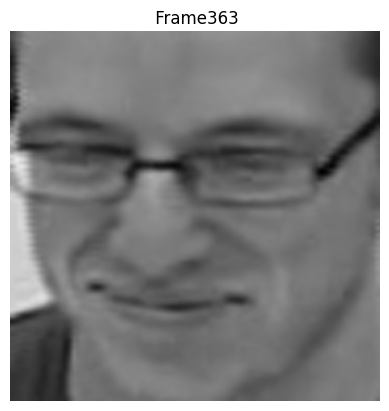

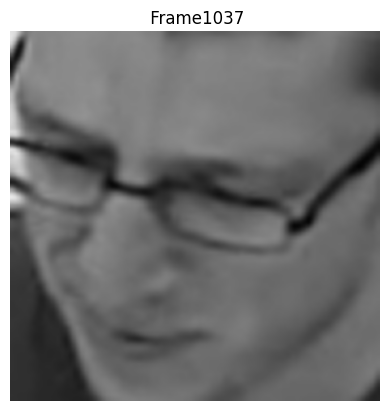

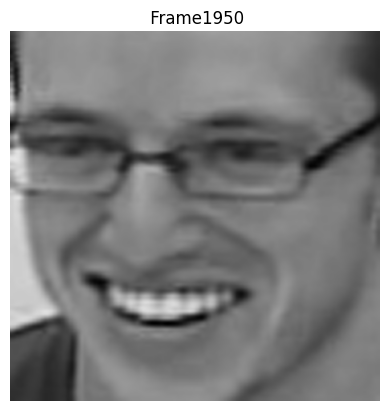

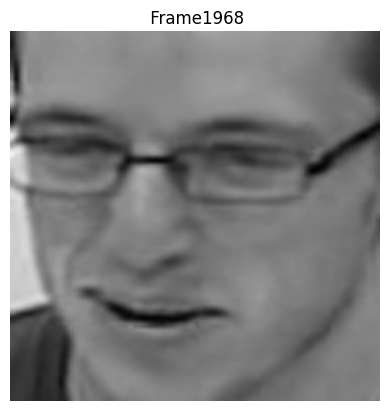

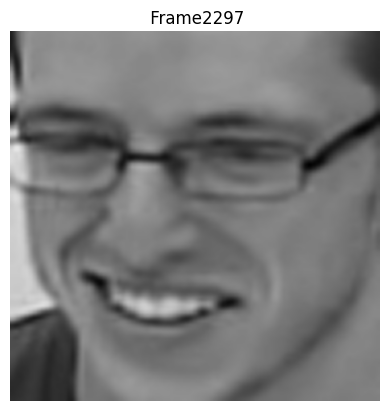

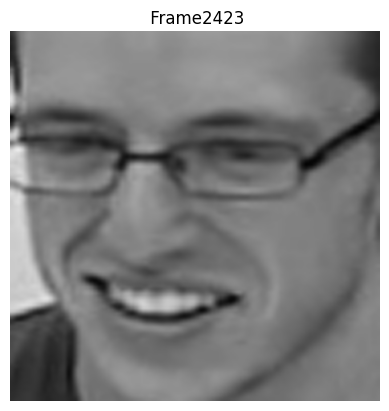

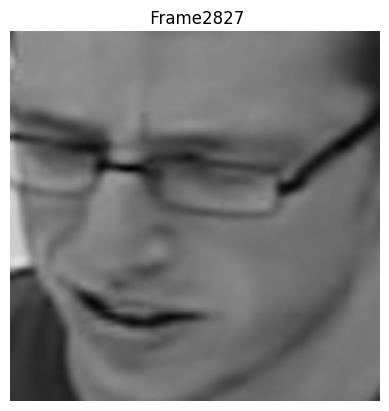

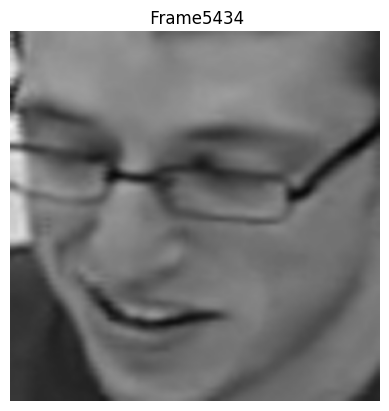

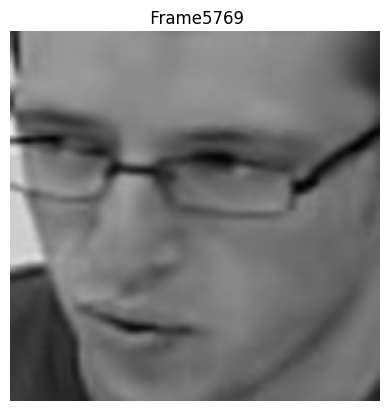

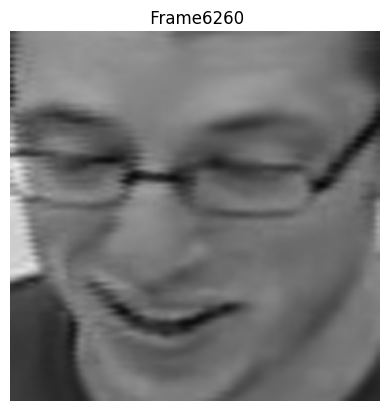

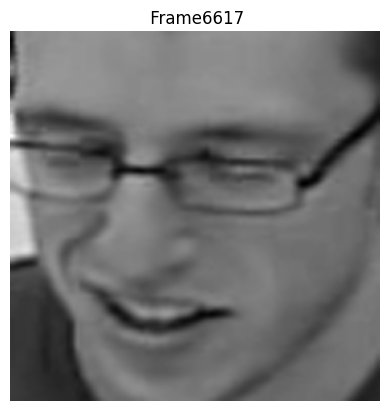

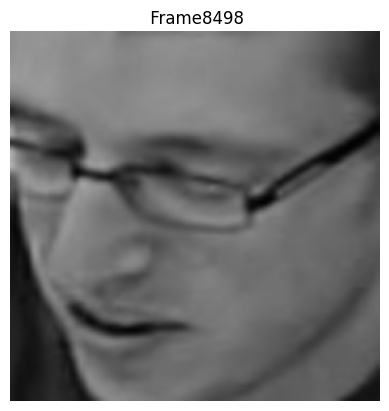

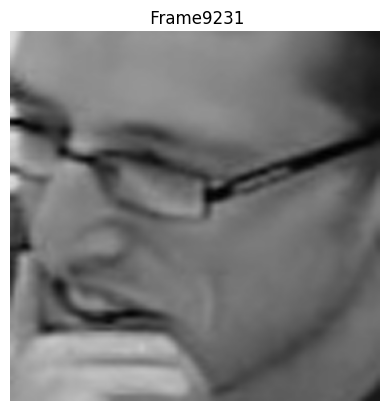

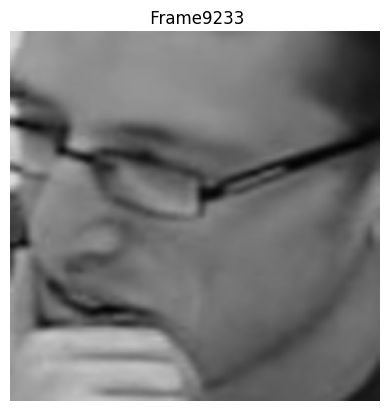

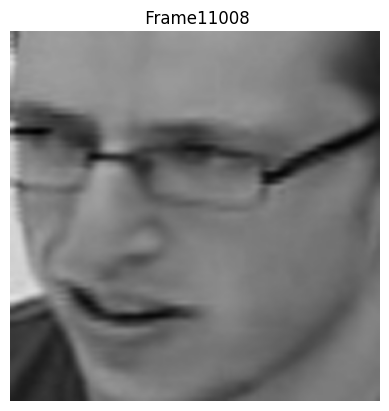

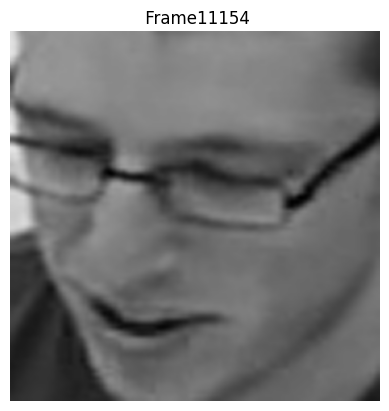

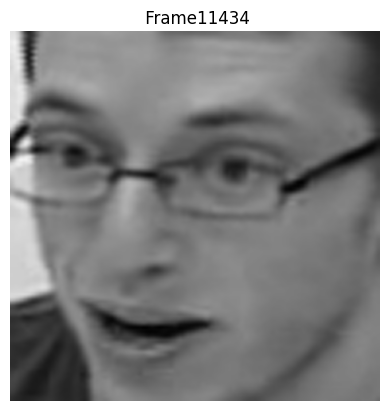

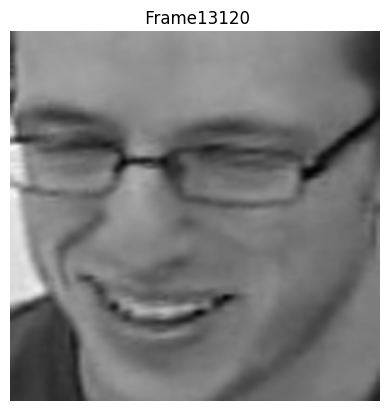

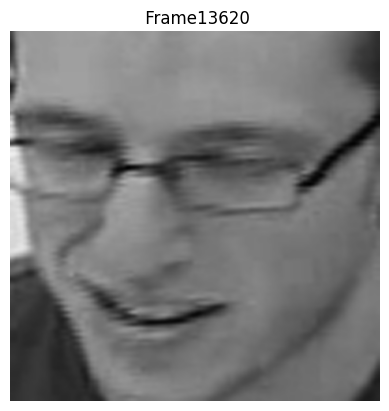

In [98]:
import numpy as np


for frame in frames:
    frame.reset_drawable_image()
    # frame.draw_face_border()
    # frame.draw_facial_landmarks()
    # if frame.facial_landmarks:
    #     frame.draw_circle_at_facial_landmark(frame.facial_landmarks[10], frame.facial_landmarks[152])
    frame.display()